## TP : Analyse Spectrale

### 1. Puissance itérée et méthode de déflation

* **Principe**

La méthode de la puissance itérée consiste à calculer la suite :

$x_{k+1} = \frac{A_{x_{k}}}{||A_{x_{k}}||}$

qui va converger vers un vecteur propre associé à la valeur propre de plus grand module $\lambda_{1}$.

* **Fonctionnement**

*Méthode de la puissance itérée*

``1.`` Choisir un vecteur initial non nul $x_0$


``2.`` Calculer : $A \times x_{0}$


``3.`` Normalisation : $\frac{A_{x_{0}}}{||A_{x_{0}}||}$


``4.`` Calculer : $\frac{x^{T}Ax}{x^{T}x}$


``5.`` Répéter ``2 & 3`` jusqu'à ce que le vecteur obtenu converge vers $\lambda_{1}$


Pour trouver les autres valeurs propres :

*Méthode de déflation* 

``5.`` Calculer $v_{1} = Ax_{0} - (x_{0}.T \times Ax_{0}) \times x_{0}$

``6.`` Normalisation : $v_{1} = \frac{v_{1}}{||v_{1}||}$

``7.`` On applique à nouveau la méthode par puissance itérée en prenant ``v1`` comme vecteur initial.

In [83]:
# Implémentation PYTHON
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import math

A   = np.matrix([[3, 4, 0], [1, 3, 0], [0, 0, 2]])
eps = 1e-15
x0  = np.matrix([2, 1, 1]).T

print("A = ")
print(A)

A = 
[[3 4 0]
 [1 3 0]
 [0 0 2]]


``Q1.``

In [84]:
# Méthode de la puissance itérée
def iterpow(A, x0, eps):
    v_anc  = 0
    v_cour = 1
    y       = x0
    nb_iter = 0
 
    while (abs(v_cour - v_anc) > eps):
        nb_iter+=1
        v_anc = v_cour
        x = y/np.linalg.norm(y)
        y = A@x
        
        # Quotient de Rayleigh
        v_cour = (x.T*y)[0,0] / (x.T*x)[0,0]
        
    return v_cour, x, nb_iter

In [85]:
v1, eigen_vector, nb_iter = iterpow(A, x0, eps)
print("\n * Lambda 1 : ")
print(v1)
print("\n * Vecteur propre associé à lambda 1 :")
print(eigen_vector)
print("\n * Nombre d'itérations : ")
print(nb_iter)



 * Lambda 1 : 
5.0

 * Vecteur propre associé à lambda 1 :
[[8.94427191e-01]
 [4.47213595e-01]
 [4.91716548e-09]]

 * Nombre d'itérations : 
21


In [86]:
# Tests multiples

# Matrices de test
A1 = np.array([[4, -1], [2, 1]])
A2 = np.array([[0, 2, 3], [0, 5, 0], [0, 8, 0]])
A3 = np.array([[3, 1, 0], [1, 2, 1], [0, 1, 3]])

params = [(A1, np.matrix([1, 1]).T, eps),
          (A2, np.matrix([1, 1, 1]).T, eps),
          (A3, np.matrix([1, 1, 1]).T, eps)]



def test_iterpow():
    for A, x0, eps in params:
        v_cour, eigen_vector, nb_iter = iterpow(A, x0, eps)
        print("Matrice de test :")
        print(A)
        print("Vecteur propre associé à la valeur propre {:.1f} :".format(v_cour))
        print(eigen_vector)
        print("Nombre d'itérations :", nb_iter)
        print()

In [87]:
test_iterpow()

Matrice de test :
[[ 4 -1]
 [ 2  1]]
Vecteur propre associé à la valeur propre 3.0 :
[[0.70710678]
 [0.70710678]]
Nombre d'itérations : 2

Matrice de test :
[[0 2 3]
 [0 5 0]
 [0 8 0]]
Vecteur propre associé à la valeur propre 5.0 :
[[0.58473129]
 [0.42994948]
 [0.68791916]]
Nombre d'itérations : 4

Matrice de test :
[[3 1 0]
 [1 2 1]
 [0 1 3]]
Vecteur propre associé à la valeur propre 4.0 :
[[0.57735027]
 [0.57735027]
 [0.57735027]]
Nombre d'itérations : 2



``Q2.`` Trace de la vitesse de convergence de la méthode

In [88]:

def iterpow_trace(A, x0, eps):
    v_anc  = 0
    v_cour = 1
    y       = x0
    nb_iter = 0
    conv = []
 
    while (abs(v_cour - v_anc) > eps):
        nb_iter+=1
        v_anc = v_cour
        x = y/np.linalg.norm(y)
        y = A@x
        v_cour = (x.T*y)[0,0] / (x.T*x)[0,0]
        diff = abs(v_cour - v_anc)
        if(diff > 0):
            conv.append(math.log10(diff))
 
    print(conv)
    plt.plot(range(1, nb_iter), conv)
    plt.title('Vitesse de convergence')
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('log10')
    plt.show()
    
    return v_cour, x, nb_iter


[0.5440680443502757, -0.3904304068932923, -1.1093470929081555, -1.8919030413550584, -2.6856220640968966, -3.481155560768471, -4.276980115232959, -5.072851258055696, -5.868729855452093, -6.664609643709324, -7.460489644570413, -8.256369483720082, -9.052250023118289, -9.848132324456563, -10.644023897907804, -11.439776475191717, -12.235922034874793, -13.02619391793429, -13.847379800543134, -14.574378528479397]


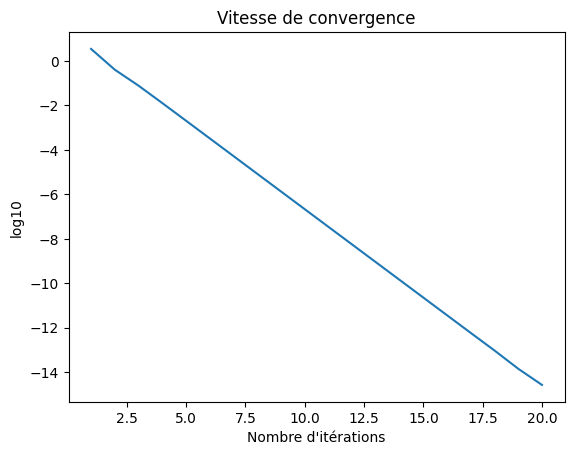

(5.0,
 matrix([[8.94427191e-01],
         [4.47213595e-01],
         [4.91716548e-09]]),
 21)

In [89]:
iterpow_trace(A, x0, eps)

``Q3.`` ``Méthode de déflation``

In [90]:

def deflation(A, x0, eps):
    n = A.shape[0] 
    eigvals = []
    eigvect = []

    for i in range(n):
        v, x, nb_iter = iterpow(A, x0, eps)
        eigvals.append(v)
        eigvect.append(x)
        
        A = A - v*((x@x.T)/(x.T@x))
        
    return eigvals, eigvect


In [91]:
deflation(A, x0, eps)

([5.0, 2.0, 1.0000000000000007],
 [matrix([[8.94427191e-01],
          [4.47213595e-01],
          [4.91716548e-09]]),
  matrix([[-1.09951163e-08],
          [-5.49755814e-09],
          [ 1.00000000e+00]]),
  matrix([[7.07106781e-01],
          [7.07106781e-01],
          [3.50943015e-24]])])

In [92]:

# Test 1
A1 = np.matrix([[0, 3], [3, -8]])
x0 = np.matrix([1, 1]).T
eps = 1e-15

eigval, eigvect = deflation(A1, x0, eps)
print("\nValeurs propres attendues : [-9 1] / Valeurs propres trouvées : \n", eigval)

# Test 2
A2 = np.matrix([[2, 0, 1], [0, 2, 0], [1, 0, 2]])
x2 = np.matrix([2, 1, 1]).T
eps = 1e-15
eigval, eigvect = deflation(A2, x2, eps)
print("\nValeurs propres attendues : [3 2 1] / Valeurs propres trouvées : \n", eigval)

# Test 3
A3 = np.matrix([[2, 1, 1], [1, 2, 1], [1, 1, 2]])
x3 = np.matrix([4, 1, 1]).T
eps = 1e-15
eigval, eigvect = deflation(A3, x3, eps)
print("\nValeurs propres attendues : [4 1 1] / Valeurs propres trouvées : \n", eigval)



Valeurs propres attendues : [-9 1] / Valeurs propres trouvées : 
 [-9.000000000000002, 1.0000000000000002]

Valeurs propres attendues : [3 2 1] / Valeurs propres trouvées : 
 [2.999999999999999, 2.000000000000001, 1.0000000000000002]

Valeurs propres attendues : [4 1 1] / Valeurs propres trouvées : 
 [4.0, 0.9999999999999998, -1.2157879835793144e-16]


## 2. PageRank de Google

``Q1.``

La matrice d'adjacence G est définie comme suit : 

* $G_{i,j} = 1$ si sur la page $j$ il y a un lien vers la page $i$

* $G_{i,j} = 0$ sinon.

In [93]:
# Lecture du fichier "webgraph.dat"

def read(filename):
    with open(filename, 'r') as f:
        lines = [line.strip().split() for line in f.readlines()]
    f.close()
    
    # Matrice d'adjacence
    G = np.zeros((500, 500)).T
    
    for l in lines:
        i, j     = int(l[0]) - 1, int(l[1]) - 1
        G[i][j]  = 1
    
    return G

In [94]:
G = read('webgraph.dat')
print(G)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


``Q2.``

Le paramètre $d$ est choisi entre 0 et 1.

In [95]:
def transition_probabiliste(G, d):
    n = np.shape(G)[0]
    A = np.zeros((n, n))
    
    for j in range(n):
        lj = 0
        
        # Nombre de liens sortants de la page j
        for row in G:
            lj+=row[j]
        
        if lj:
            for i in range(n):
                A[i,j] = d/n + ((1-d)/lj) * G[i,j]
        else:
            A[:,j] = 1/n

    return np.matrix(A)

In [96]:
AP = transition_probabiliste(G, 0.7)
print(AP)

[[0.0014     0.0020424  0.00204378 ... 0.0014     0.0014     0.0014    ]
 [0.0014     0.0014     0.0014     ... 0.0014     0.0014     0.0014    ]
 [0.002025   0.0020424  0.0014     ... 0.0014     0.0014     0.0014    ]
 ...
 [0.002025   0.0020424  0.00204378 ... 0.0014     0.0764     0.0014    ]
 [0.002025   0.0020424  0.00204378 ... 0.0764     0.0014     0.0014    ]
 [0.002025   0.0020424  0.00204378 ... 0.0014     0.0014     0.0014    ]]


In [97]:
# Popularité des pages
x0 = np.matrix(np.ones(500)).T
v1, p, nb_iter = iterpow(AP, x0, 1e-15)

#print(p)
print("* Valeur propre de + grand module : ", v1)
#print("* Vecteur propre associé : ", p)

* Valeur propre de + grand module :  1.0


``Q3``

``Pour déterminer les pages les plus populaires, nous trions les éléments de p par ordre décroissant.``

In [98]:
# Tri décroissant sur p 
popularity = np.argsort(p, axis=0)[::-1]

# Affichage des 20 pages les + populaires
for i in range(20):
    page_index = popularity[i, 0] + 1
    print("{:d} : page n° {:d} | Probabilité : {:f}".format(i + 1, page_index, float(p[i][0])))

1 : page n° 6 | Probabilité : 0.023611
2 : page n° 55 | Probabilité : 0.012890
3 : page n° 158 | Probabilité : 0.017116
4 : page n° 161 | Probabilité : 0.017540
5 : page n° 160 | Probabilité : 0.015787
6 : page n° 176 | Probabilité : 0.666179
7 : page n° 159 | Probabilité : 0.014469
8 : page n° 177 | Probabilité : 0.015349
9 : page n° 178 | Probabilité : 0.020010
10 : page n° 44 | Probabilité : 0.013457
11 : page n° 153 | Probabilité : 0.013457
12 : page n° 224 | Probabilité : 0.017034
13 : page n° 76 | Probabilité : 0.015639
14 : page n° 280 | Probabilité : 0.012890
15 : page n° 162 | Probabilité : 0.012890
16 : page n° 80 | Probabilité : 0.012905
17 : page n° 54 | Probabilité : 0.014174
18 : page n° 1 | Probabilité : 0.014078
19 : page n° 82 | Probabilité : 0.013977
20 : page n° 190 | Probabilité : 0.012890


``Q4.``


In [99]:
def system_eigenval(A):
    A_minus_I = A - np.identity(500)
    b = np.linalg.solve(A_minus_I, np.zeros(500))
    return b

In [100]:
res = system_eigenval(AP)

In [101]:
# Mesure du temps d'exécution
import time

In [102]:
start = time.perf_counter()

for i in range(1000):
    p = system_eigenval(AP)
    
    # Tri décroissant sur p 
    popularity = np.argsort(p, axis=0)[::-1]
    
    # Affichage des 20 pages les + populaires
    for k in range(20):
        page_index = popularity[k] + 1
        #print(page_index)
    
end = time.perf_counter()
print("Temps d'exécution : ", end - start, " secondes")

Temps d'exécution :  18.190107000000125  secondes


In [103]:
start = time.perf_counter()

x0 = np.matrix(np.ones(500)).T

for i in range(1000):
    #AP = transition_probabiliste(G, 0.7)

    _, p, _ = iterpow(AP, x0, 1e-15)

    # Tri décroissant sur p 
    popularity = np.argsort(p, axis=0)[::-1]

    # Affichage des 20 pages les + populaires
    for i in range(20):
        page_index = popularity[i, 0] + 1
        #print(page_index)
    
end = time.perf_counter()
print("Temps d'exécution : ", end - start, " secondes")

Temps d'exécution :  5.905897200000027  secondes


* ***Observation*** : La résolution par la méthode de la puissance itérée semble plus rapide que la résolution directe par système linéaire avec l'implémentation proposée.